# PRACTICA #1 Clasificación Básica: Predecir una imagen de moda

## Clonamos el repositorio para obtener los datos

In [1]:
#! git clone https://github.com/zalandoresearch/fashion-mnist.git

In [2]:
#! mv fashion-mnist/ Practica_1/

## Observemos La primera image y primera etiqueta

In [3]:
from dataset import *
import matplotlib.pyplot as plt

In [4]:
train_images_file_path = "fashion-mnist/data/fashion/train-images-idx3-ubyte.gz"
train_labels_file_path = "fashion-mnist/data/fashion/train-labels-idx1-ubyte.gz"
test_images_file_path = "fashion-mnist/data/fashion/t10k-images-idx3-ubyte.gz"
test_labels_file_path = "fashion-mnist/data/fashion/t10k-labels-idx1-ubyte.gz"

x_train = read_mnist_images(train_images_file_path)
y_train = read_mnist_labels(train_labels_file_path)

x_test = read_mnist_images(test_images_file_path)
y_test = read_mnist_labels(test_labels_file_path)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

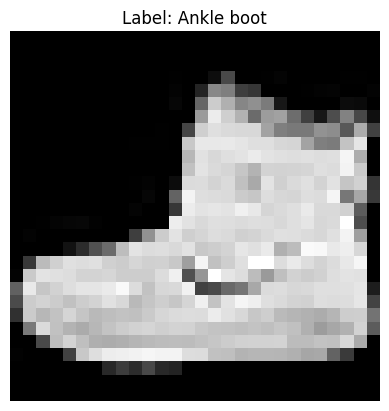

In [5]:
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {class_names[y_train[0]]}")
plt.axis('off')
plt.show()

In [6]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [40]:
for i in range(0,10):
    print(f'la etiqueta {i} tiene {y_train[ y_train == i].shape[0]} datos')

la etiqueta 0 tiene 6000 datos
la etiqueta 1 tiene 6000 datos
la etiqueta 2 tiene 6000 datos
la etiqueta 3 tiene 6000 datos
la etiqueta 4 tiene 6000 datos
la etiqueta 5 tiene 6000 datos
la etiqueta 6 tiene 6000 datos
la etiqueta 7 tiene 6000 datos
la etiqueta 8 tiene 6000 datos
la etiqueta 9 tiene 6000 datos


El dataset esta balanceado

## Normalizemos las imagenes y convercion a tensores

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from Model import SimpleNN
from ml_helper import *

In [8]:
x_train = torch.tensor(x_train, dtype = torch.float32) / 255.0
y_train = torch.tensor(y_train, dtype=torch.int64)

x_test = torch.tensor(x_test, dtype = torch.float32) / 255.0
y_test = torch.tensor(y_test, dtype=torch.int64)

In [9]:
print(x_train.min(), x_train.max())

tensor(0.) tensor(1.)


## Crear un conjunto de datos y cargador de datos

In [10]:
# Crear un conjunto de datos y cargador de datos
train_dataset = TensorDataset(x_train, y_train)
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

## Crear el modelo

In [11]:
# Instanciar la red neuronal y el optimizador
nb_epochs = 10
lr = 1e-3

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

training_loss = training(model, optimizer, criterion,
                         nb_epochs, train_dataloader)

/home/dany/anaconda3/envs/NeRF/lib/python3.10/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995026/work/c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [1/10], Loss: 1.0042
Epoch [2/10], Loss: 0.3140
Epoch [3/10], Loss: 0.5155
Epoch [4/10], Loss: 0.2512
Epoch [5/10], Loss: 0.2735
Epoch [6/10], Loss: 0.5496
Epoch [7/10], Loss: 0.3347
Epoch [8/10], Loss: 0.1814
Epoch [9/10], Loss: 0.0862
Epoch [10/10], Loss: 0.4384


In [12]:
torch.save(model, 'model_1')

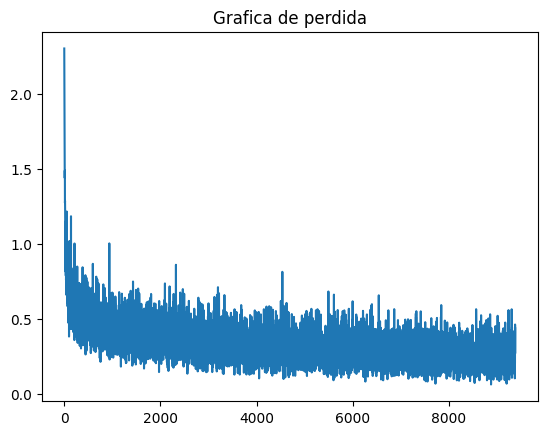

In [41]:
plt.plot(training_loss)
plt.title('Grafica de perdida')
plt.savefig('loss_curve.jpg', format='jpg', dpi=300)
plt.show()

## Testing

In [14]:
test_dataset = TensorDataset(x_test, y_test)
batch_size = 64
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [15]:
model = torch.load('model_1')

In [16]:
error_idx, predicted = test(model, test_dataloader)

Test Accuracy: 88.2%


## Cantidad de parametros

In [17]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(101770, [100352, 128, 1280, 10])

## Predicciones

In [18]:
idx = np.random.randint(0,10000)

In [19]:
output = model(x_test[idx].unsqueeze(0))

In [20]:
_, prediction = torch.max(output, dim=1)

In [21]:
prediction,  y_test[idx]

(tensor([6]), tensor(6))

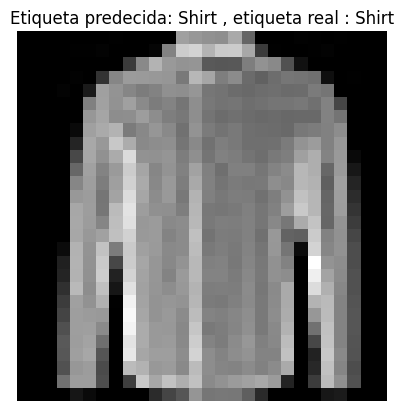

In [42]:
plt.imshow(x_test[idx], cmap="gray")
plt.title(f"Etiqueta predecida: {class_names[prediction]} , etiqueta real : {class_names[ y_test[idx]]}")
plt.axis('off')
plt.savefig('prediccion_imagen.jpg', format='jpg', dpi=300)
plt.show()

## Observar predicciones equivocadas 

In [23]:
idx_tensor = torch.cat(error_idx, dim=0) 
idx_tensor.shape

torch.Size([10000])

In [24]:
predicted_tensor = torch.cat(predicted, dim=0) 
predicted_tensor.shape

torch.Size([10000])

In [25]:
# Find the indices where values are False (equivalent to 0)
false_indices = torch.nonzero(idx_tensor == 0).squeeze()

print(f'numero de indices donde la etiqueta fue mal predecida: {false_indices}')

numero de indices donde la etiqueta fue mal predecida: tensor([  12,   17,   23,  ..., 9977, 9979, 9989])


In [26]:
print(f'Cantidad de etiquetas equivocadas: {false_indices.shape[0]}')

Cantidad de etiquetas equivocadas: 1180


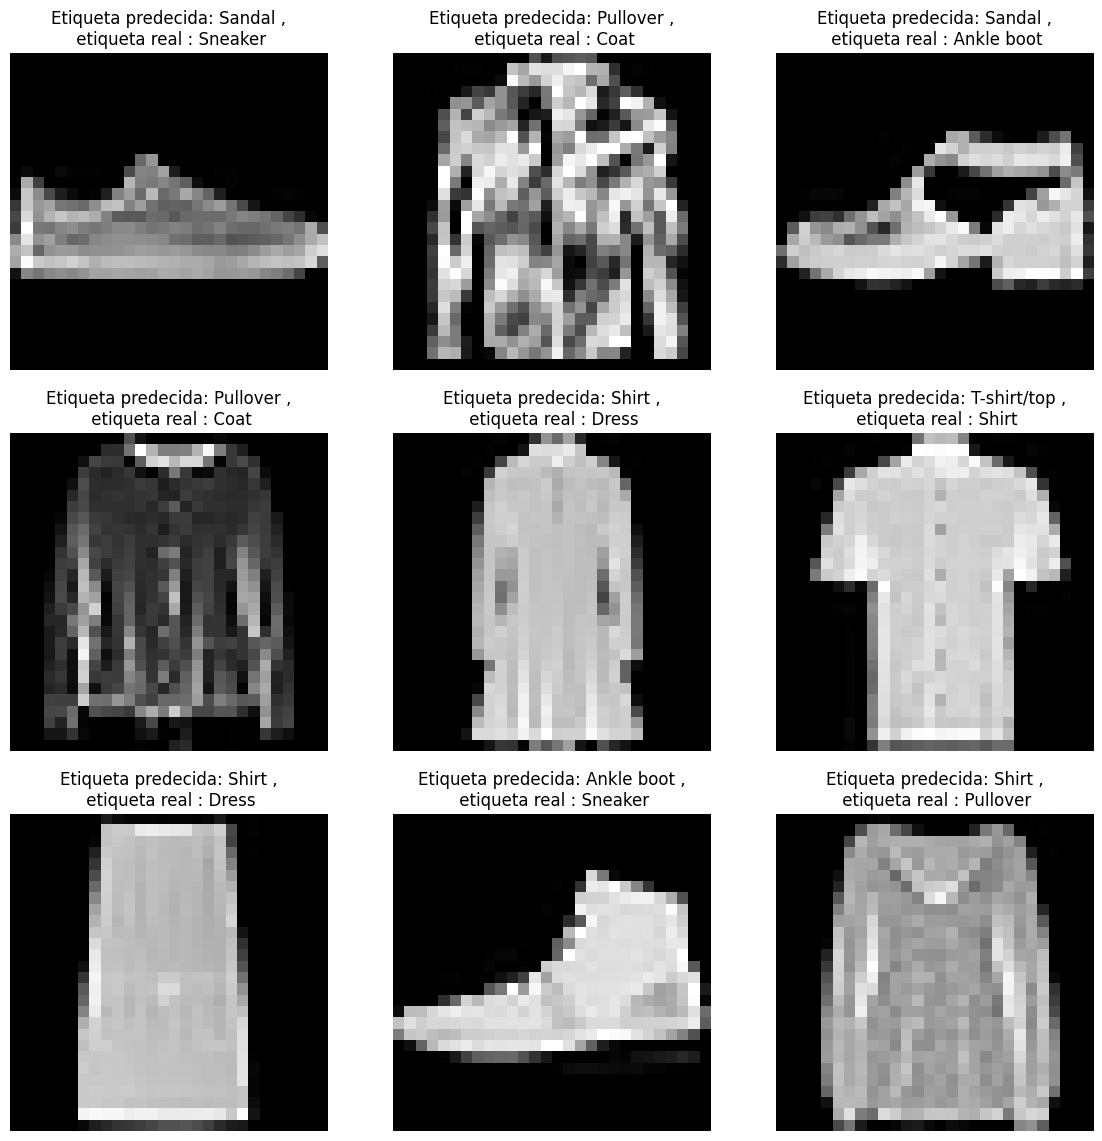

In [43]:
fig, ax = plt.subplots(3,3, figsize=(14,14))

ax[0,0].imshow(x_test[false_indices[0]], cmap="gray")
ax[0,0].set_title(f"Etiqueta predecida: {class_names[predicted_tensor[false_indices[0]]]} ,\n etiqueta real : {class_names[ y_test[false_indices[0]]]}")

ax[0,1].imshow(x_test[false_indices[1]], cmap="gray")
ax[0,1].set_title(f"Etiqueta predecida: {class_names[predicted_tensor[false_indices[1]]]} ,\n etiqueta real : {class_names[ y_test[false_indices[1]]]}")

ax[0,2].imshow(x_test[false_indices[2]], cmap="gray")
ax[0,2].set_title(f"Etiqueta predecida: {class_names[predicted_tensor[false_indices[2]]]} ,\n etiqueta real : {class_names[ y_test[false_indices[2]]]}")

ax[1,0].imshow(x_test[false_indices[3]], cmap="gray")
ax[1,0].set_title(f"Etiqueta predecida: {class_names[predicted_tensor[false_indices[3]]]} ,\n etiqueta real : {class_names[ y_test[false_indices[3]]]}")

ax[1,1].imshow(x_test[false_indices[4]], cmap="gray")
ax[1,1].set_title(f"Etiqueta predecida: {class_names[predicted_tensor[false_indices[4]]]} ,\n etiqueta real : {class_names[ y_test[false_indices[4]]]}")

ax[1,2].imshow(x_test[false_indices[5]], cmap="gray")
ax[1,2].set_title(f"Etiqueta predecida: {class_names[predicted_tensor[false_indices[5]]]} ,\n etiqueta real : {class_names[ y_test[false_indices[5]]]}")

ax[2,0].imshow(x_test[false_indices[6]], cmap="gray")
ax[2,0].set_title(f"Etiqueta predecida: {class_names[predicted_tensor[false_indices[6]]]} ,\n etiqueta real : {class_names[ y_test[false_indices[6]]]}")

ax[2,1].imshow(x_test[false_indices[7]], cmap="gray")
ax[2,1].set_title(f"Etiqueta predecida: {class_names[predicted_tensor[false_indices[7]]]} ,\n etiqueta real : {class_names[ y_test[false_indices[7]]]}")

ax[2,2].imshow(x_test[false_indices[8]], cmap="gray")
ax[2,2].set_title(f"Etiqueta predecida: {class_names[predicted_tensor[false_indices[8]]]} ,\n etiqueta real : {class_names[ y_test[false_indices[8]]]}")


for row in ax:
    for axis in row:
        axis.axis('off')

plt.savefig('example_errors.jpg', format='jpg', dpi=300)
plt.show()

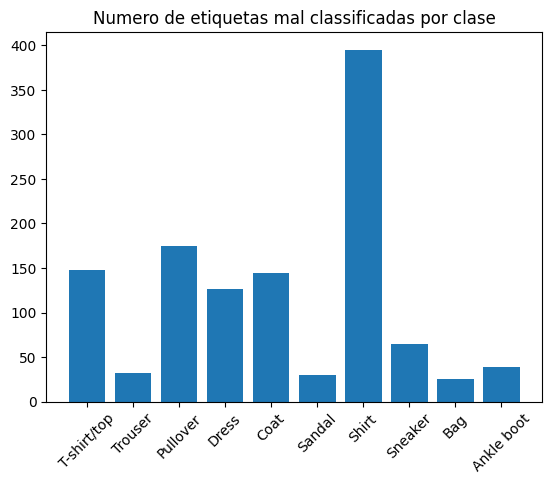

In [49]:
error_counts = torch.bincount(y_test[false_indices])


plt.bar(class_names, error_counts)
plt.title('Numero de etiquetas mal classificadas por clase')
plt.xticks(rotation=45)
plt.savefig('bar_errors.jpg', format='jpg', dpi=300)
plt.show()

In [46]:
print(error_counts)

tensor([148,  32, 175, 126, 144,  30, 395,  65,  26,  39])
